## Value iteration ##

Recipe section: 

1. Starting with an empty value table
2. start with a random path
3. calculate the value of each state
4. repeat steps 2-3 until convergence

5. then derive the best path based on highest V values, starting at 0,0


Here, I am also going to attempt to use the 'class' structure here 

In [125]:
import numpy as np


 Making an empty array for the value table 

In [126]:
value_table = np.zeros((25))

Reusing the reward function, avaliable action table from Q-learning section 

In [127]:
choice = np.array([[0,-1], [0,+1], [-1,0],[+1,0]])

action = np.zeros((25,4))

for x in range (0,5):
    for y in range(0,5):

        s = x + 5*y
        for a in range (0,4):
        
        #0=up(0,-1)
        #1=down(0,+1)
        #2=left(-1,0)
        #3=right(+1,0)

            next_x = x + choice[a,0]
            next_y = y + choice[a,1]
            action[s,a] = next_x + 5*next_y

            if next_x < 0 or next_x >4 or next_y < 0 or next_y >4:

                # slightly different to Q-table, I will not permit an action that goes out of bounds
                action[s,a] = 0

print(action)



[[ 0.  5.  0.  1.]
 [ 0.  6.  0.  2.]
 [ 0.  7.  1.  3.]
 [ 0.  8.  2.  4.]
 [ 0.  9.  3.  0.]
 [ 0. 10.  0.  6.]
 [ 1. 11.  5.  7.]
 [ 2. 12.  6.  8.]
 [ 3. 13.  7.  9.]
 [ 4. 14.  8.  0.]
 [ 5. 15.  0. 11.]
 [ 6. 16. 10. 12.]
 [ 7. 17. 11. 13.]
 [ 8. 18. 12. 14.]
 [ 9. 19. 13.  0.]
 [10. 20.  0. 16.]
 [11. 21. 15. 17.]
 [12. 22. 16. 18.]
 [13. 23. 17. 19.]
 [14. 24. 18.  0.]
 [15.  0.  0. 21.]
 [16.  0. 20. 22.]
 [17.  0. 21. 23.]
 [18.  0. 22. 24.]
 [19.  0. 23.  0.]]


Create a function that will update the value of each state based on reward + bellman's eq

 -  this system will be stochastic - where the best decision will be made 90% of the time


In [128]:
def value_update(state,value_table,stochastic): 
    
    def reward_system (current_state,next_state): 
        punishment = False
        if next_state == 7 or next_state == 8 or next_state == 10 or next_state == 13 or next_state == 15:
            reward = int(-400)
            punishment = True
        if next_state == 24:
            reward = 500

        # adding a section that adjust award based on the distance from destination

        if punishment != True:
            x = next_state % 5
            y = next_state // 5
            dist_x = 4-x
            dis_y = 4-y
            distance = dist_x + dis_y
            reward = (np.sqrt(32)-distance)*20

        if next_state == 0 and (current_state != 1 or current_state != 5):
            reward = 0
        
        return reward
    

    #retreive the possible next states
    next_states = action[state]
    #find the best next state based on both immediate reward and long term
    next_states_value = [value_table[int(next_states[i])] + 0.5*reward_system(state,int(next_states[i])) for i in range(len(next_states))]

    best_state = np.argmax(next_states_value)
    running_count = 0
    
    if stochastic == True:
        # if stochastic, the best state will be chosen 90% of the time
        # and the other states will be chosen 3% of the time
    
        for i in range (len(next_states)):

            # equation: Value of state = probability of this (reward of next transition + discount factor * value of next state)
            
            if i  == best_state:

                running_count += 0.70*(reward_system(state,int(next_states[i])) + 0.9*value_table[int(next_states[i])])

            elif next_states[i] == 0 and (state != 1 or state != 5):

                running_count += 0
            else:

                running_count += 0.1*(reward_system(state,int(next_states[i])) + 0.9*value_table[int(next_states[i])])

    else:
        running_count = (reward_system(state, int(next_states[best_state])) + 0.7 * value_table[int(next_states[best_state])])
    return running_count




In [129]:
convergence = False
value_table[24] = 1000
while convergence != True: 
    
    sum = 0

    for i in range (0,24):
        
        original = value_table[i]
        value_table[i] = value_update(i,value_table, stochastic = True)
        diff = (abs(original-value_table[i])/original)*100

        sum += diff

    if sum/25 < 0.05: 
        convergence = True

value_grid = np.array(value_table).reshape((5, 5))
print(value_grid)

[[ -33.24389252  -18.18346335   81.09600705  228.58481657  365.12219223]
 [ -55.7476952   127.57961474  315.55332663  370.21860371  501.01510383]
 [ 135.90773411  365.43967086  514.32170579  650.06147223  671.91699237]
 [ 346.33830154  558.59546885  716.08261345  781.04155289  854.58964556]
 [ 398.56853895  604.5675054   736.11703409  860.36764932 1000.        ]]


/tmp/ipykernel_1776/3321024448.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  diff = (abs(original-value_table[i])/original)*100


from Chatgpt to visualise the value table

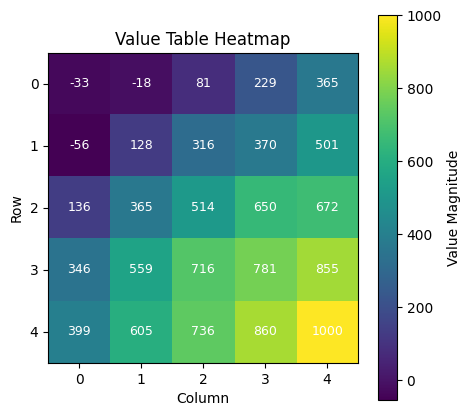

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Plot heatmap
plt.figure(figsize=(5, 5))
plt.imshow(value_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value Magnitude')

# Optional: Annotate with actual values
for i in range(5):
    for j in range(5):
        plt.text(j, i, str(round(value_grid[i, j])), ha='center', va='center', color='white', fontsize=9)

plt.title("Value Table Heatmap")
plt.xlabel("Column")
plt.ylabel("Row")
plt.xticks(range(5))
plt.yticks(range(5))

 # So (0,0) is top-left like in grid worlds
plt.grid(False)
plt.show()

### generate the ideal policy from this value table ###

Best sequence of steps to state 24: [0, 1, 6, 11, 16, 17, 18, 23, 24]


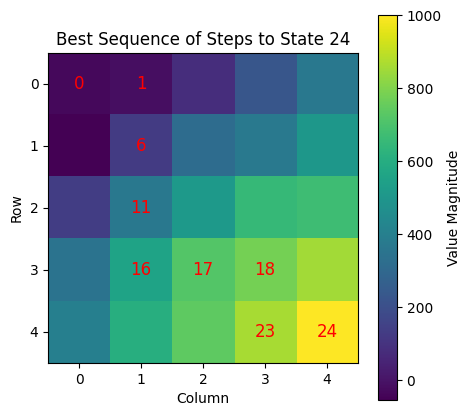

In [131]:
def best_decision (state, action, value_table):
    # find which action bring in the highest value
    next_step = action[state]
    next_step_int = next_step.astype(int)
    next_step_value = value_table[next_step_int]
    best_choice_index = int(np.argmax(next_step_value))
    result = int(next_step_int[best_choice_index])
    return result

# run loop to get the best sequence of steps to state 24

state = 0 

best_sequence = []
best_sequence.append(state)
while state != 24: 
    
    state = best_decision(state, action, value_table)
    best_sequence.append(state)

print ("Best sequence of steps to state 24:", best_sequence)


# visualise the best sequence of steps
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.imshow(value_grid, cmap='viridis', interpolation='nearest')
for i in range(len(best_sequence)):
    x = best_sequence[i] % 5
    y = best_sequence[i] // 5
    plt.text(x, y, str(best_sequence[i]), ha='center', va='center', color='red', fontsize=12)
plt.colorbar(label='Value Magnitude')
plt.title("Best Sequence of Steps to State 24")
plt.xlabel("Column")
plt.ylabel("Row")
plt.xticks(range(5))
plt.yticks(range(5))
plt.grid(False)
plt.show()